# A simple inverse-CDF sampling method

In [1]:
import numpy as np, scipy as sp, matplotlib.pyplot as plt
from scipy.stats import norm, t

This method allows us to sample from a grid approximation of an arbitrary probability distribution. This is useful for doing inference with a posterior that isn't any standard distribution, which can easily arise when the prior and likelihood are not conjugate to one another. An example from lecture:

$$
\begin{align*}
y_i &\sim t_3(\theta, 1) \\
\theta &\sim \mathrm{Normal}(10, 5)
\end{align*}
$$

Suppose we observe three data points, at $y = 8.1, 13.5, 5.2$. Then our (un-normalized) posterior is just a product:

$$
p(\theta | y) \propto p(\theta) p(y = 8.1 | \theta) p(y = 13.5 | \theta) p(y = 5.2 | \theta)
$$

where each of the densities on the right hand side is a normal or Student's *t* PDF. So it's easy enough to compute the un-normalized posterior density. But to extract useful information such as quantiles or expectations, an un-normalized distribution isn't enough. So, one thing we can do is sample from this density. This notebook lays out a crude but effective version of the inverse-CDF sampling method that works given only a grid approximation of the posterior PDF.

In [11]:
# Prior: norm(10, 5)
# Likelihood: t(df=3, loc=theta, scale=2)
# y = 8.1, 13.5, 5.2
# Make a grid of thetas and compute the un-normalized posterior distribution.

theta = np.arange(0, 20, 0.01)
post = norm.pdf(theta, 10, 5) * t.pdf(8.1, df=3, loc=theta, scale=1) * t.pdf(13.5, df=3, loc=theta, scale=1) * t.pdf(5.2, df=3, loc=theta, scale=1)

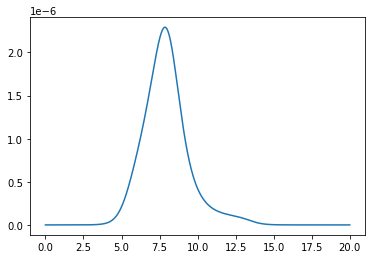

In [3]:
plt.plot(theta, post)
plt.show()

### Normalize the PDF

In [4]:
np.sum(post * 0.01)
norm_post = post / np.sum(post * 0.01)

### Building the CDF

In [5]:
cdf = np.cumsum(norm_post * 0.01)

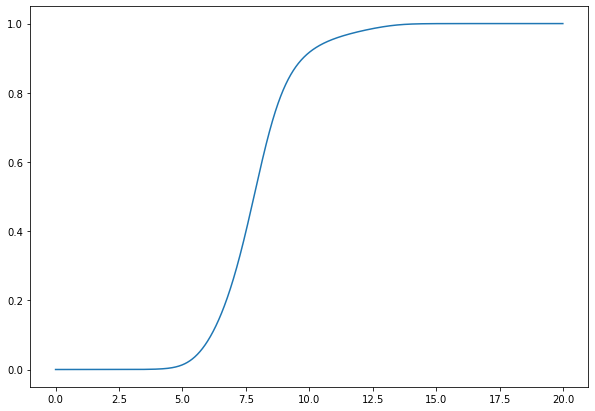

In [6]:
plt.figure(figsize=(10, 7))
plt.plot(theta, cdf)
plt.show()

Want to solve the equation:

$$ F(x) = u $$

for $x$. So we translate it to

$$ F(x) - u = 0 $$

Since we are working with a grid approximation, we have no guarantee that any grid point $x$ has $F(x) = u$ -- in fact with high probability, this won't happen! So we instead find the value $x$ so that $F(x) - u$ has the smallest absolute value.

In [7]:
def draw(grid, cdf):
    u = np.random.rand()
    diff = cdf - u
    idx = np.argmin(np.abs(diff))
    return grid[idx]

In [8]:
draw(theta, cdf)

7.29

In [9]:
sample = [draw(theta, cdf) for i in range(100000)]

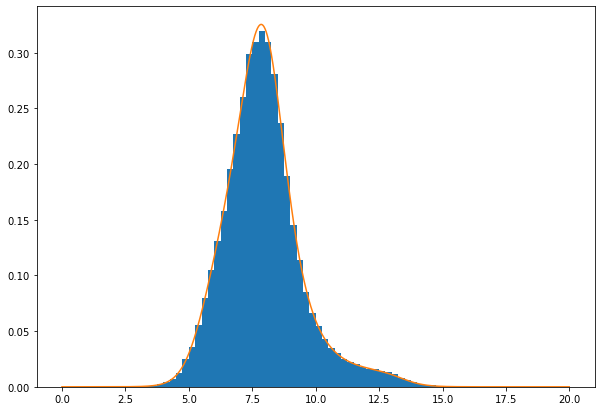

In [10]:
plt.figure(figsize=(10, 7))
plt.hist(sample, bins = np.arange(0, 20, 0.25), density = True)
plt.plot(theta, norm_post)
plt.show()